# Cubic TCP Simulation Analyzes

Two simulations were done.
- in the first simulation everything was normal.
- in the second simulation there was more packet loss.

Threading was used to simulate packet loss and timeout which waits for random number and then their actions get executed.

### importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [3]:
df11 = pd.read_csv('cubic_tcp_parameters1.csv')

df12 = pd.read_csv('log1.log', delimiter='--', engine='python', names=['round', 'message'])
df12['round'] = df12['round'].astype(int)
df12['message'] = df12['message'].astype(str).apply(str.strip)

In [4]:
df11.head()

,t,cwnd,wmax,k,t_lastloss
0,1.0,10.726070,4.169775,30.0,0.0
1,2.0,12.142048,4.169775,30.0,0.0
2,3.0,13.560068,4.169775,30.0,0.0
3,4.0,14.772302,4.169775,30.0,0.0
4,5.0,15.818625,4.169775,30.0,0.0


In [5]:
df12.head()

,round,message
0,1,Cubic Function
1,1,k: 4.169775457701303
2,1,"time_since_loss: 1, target_cwnd: 17.2607022919..."
3,1,cwnd(10): < target_cwnd(17.260702291936177)
4,1,Cubic Increase


In [6]:
df21 = pd.read_csv('cubic_tcp_parameters2.csv')

df22 = pd.read_csv('log2.log', delimiter='--', engine='python', names=['round', 'message'])
df22['round'] = df22['round'].astype(int)
df22['message'] = df22['message'].astype(str).apply(str.strip)

In [7]:
df21.head()

,t,cwnd,wmax,k,t_lastloss
0,1.0,10.726070,4.169775,30.0,0.0
1,2.0,12.142048,4.169775,30.0,0.0
2,3.0,13.560068,4.169775,30.0,0.0
3,4.0,14.772302,4.169775,30.0,0.0
4,5.0,15.818625,4.169775,30.0,0.0


In [8]:
df22.head()

,round,message
0,1,Cubic Function
1,1,k: 4.169775457701303
2,1,"time_since_loss: 1, target_cwnd: 17.2607022919..."
3,1,cwnd(10): < target_cwnd(17.260702291936177)
4,1,Cubic Increase


#### NOTE:
- df11, df21 contain tcp values at the end of each round(RTT).
- df12, df22 contain Cubic TCP logs in 1000 round(RTT).
- in the first simulation (df11, df12) everything was normal.
- in the second simulation (df21, df22) there was more packet loss.

### Get Certain Rounds Info
simply just change the n and see the results.

#### - Cubic TCP parameters data at the end of round n

In [9]:
n = 1

In [10]:
df11.loc[df11['t']== n]

,t,cwnd,wmax,k,t_lastloss
0,1.0,10.72607,4.169775,30.0,0.0


In [11]:
df21.loc[df21['t']== n]

,t,cwnd,wmax,k,t_lastloss
0,1.0,10.72607,4.169775,30.0,0.0


#### - Bic TCP logs at round n

In [12]:
df12.loc[df12['round']== n]

,round,message
0,1,Cubic Function
1,1,k: 4.169775457701303
2,1,"time_since_loss: 1, target_cwnd: 17.2607022919..."
3,1,cwnd(10): < target_cwnd(17.260702291936177)
4,1,Cubic Increase
5,1,cwnd: 10.726070229193617


In [13]:
df22.loc[df22['round']== n]

,round,message
0,1,Cubic Function
1,1,k: 4.169775457701303
2,1,"time_since_loss: 1, target_cwnd: 17.2607022919..."
3,1,cwnd(10): < target_cwnd(17.260702291936177)
4,1,Cubic Increase
5,1,cwnd: 10.726070229193617


### Descriptive Statistics of the first dataframe.
without considering round column

In [14]:
df11.iloc[:, 1:].describe()

,cwnd,wmax,k,t_lastloss
count,1000.000000,1.000000e+03,1000.0,1000.000000
mean,3469.982522,4.169775e+00,30.0,427.191000
std,4187.786378,3.909941e-14,0.0,284.157724
min,10.726070,4.169775e+00,30.0,0.000000
25%,305.829311,4.169775e+00,30.0,244.000000
50%,1654.148615,4.169775e+00,30.0,375.000000
75%,5367.232538,4.169775e+00,30.0,580.000000
max,18120.907955,4.169775e+00,30.0,982.000000


In [15]:
df21.iloc[:, 1:].describe()

,cwnd,wmax,k,t_lastloss
count,1000.000000,1.000000e+03,1000.0,1000.000000
mean,66.560011,4.169775e+00,30.0,489.971000
std,74.298308,3.909941e-14,0.0,289.405269
min,10.726070,4.169775e+00,30.0,0.000000
25%,19.631300,4.169775e+00,30.0,221.000000
50%,28.366034,4.169775e+00,30.0,485.000000
75%,83.703629,4.169775e+00,30.0,725.000000
max,385.995501,4.169775e+00,30.0,998.000000


### Get rounds where packet loss or timeout occured.

In [17]:
def get_packet_loss_rounds(df):
    """
    it filters the given dataframe and make a list of the round numbers
    and prints the len of list and the list.
    """
    filtered_df = df.loc[df['message'] == 'PACKET LOSS']
    rounds = filtered_df['round'].tolist()
    print(len(rounds))
    print(*rounds, sep=' ,') 

In [18]:
get_packet_loss_rounds(df12)

9
146 ,193 ,244 ,375 ,580 ,776 ,845 ,982 ,1001


In [19]:
get_packet_loss_rounds(df22)

68
32 ,35 ,54 ,61 ,93 ,114 ,116 ,134 ,145 ,176 ,200 ,202 ,220 ,221 ,254 ,270 ,294 ,297 ,298 ,323 ,326 ,333 ,333 ,364 ,375 ,391 ,392 ,404 ,408 ,415 ,429 ,433 ,450 ,480 ,485 ,515 ,524 ,533 ,541 ,570 ,579 ,604 ,632 ,653 ,673 ,699 ,723 ,725 ,753 ,764 ,781 ,807 ,808 ,826 ,859 ,862 ,878 ,893 ,904 ,917 ,918 ,946 ,967 ,972 ,981 ,998 ,998 ,1001


### Plotting Cubic TCP parameters over time.

In [20]:
def plot_parameters_vs_rounds(df, parameters):
    """
    it makes one figure and axes with len of parameters.
    one by one the plot color changes from green to blue.
    and if the given parameter is not valid it pass and checks other parameters.
    
    args:
         -df: dataframe
         -parameters: list of tcp parmaeters to plot.
    """
    columns_number = len(parameters)
    fig, axs = plt.subplots(columns_number, 1, figsize=(15 , 18))
    for i in range(len(parameters)):
        parameter = parameters[i]
        if parameter not in df:
            continue
        axs[i].plot(df['t'], df[parameter], label=parameter, color='green' if i % 2 == 0 else 'blue')
        axs[i].set_xlabel('Round Number')
        axs[i].set_ylabel(parameter)
        axs[i].set_title(f'{parameter} Evolution')
        axs[i].grid(True)
        axs[i].legend()

In [21]:
df11

,t,cwnd,wmax,k,t_lastloss
0,1.0,10.726070,4.169775,30.0,0.0
1,2.0,12.142048,4.169775,30.0,0.0
2,3.0,13.560068,4.169775,30.0,0.0
3,4.0,14.772302,4.169775,30.0,0.0
4,5.0,15.818625,4.169775,30.0,0.0
...,...,...,...,...,...
995,996.0,53.559800,4.169775,30.0,982.0
996,997.0,62.607021,4.169775,30.0,982.0
997,998.0,72.664501,4.169775,30.0,982.0
998,999.0,83.703629,4.169775,30.0,982.0


In [22]:
parameters = ['cwnd', 'wmax', 'k']

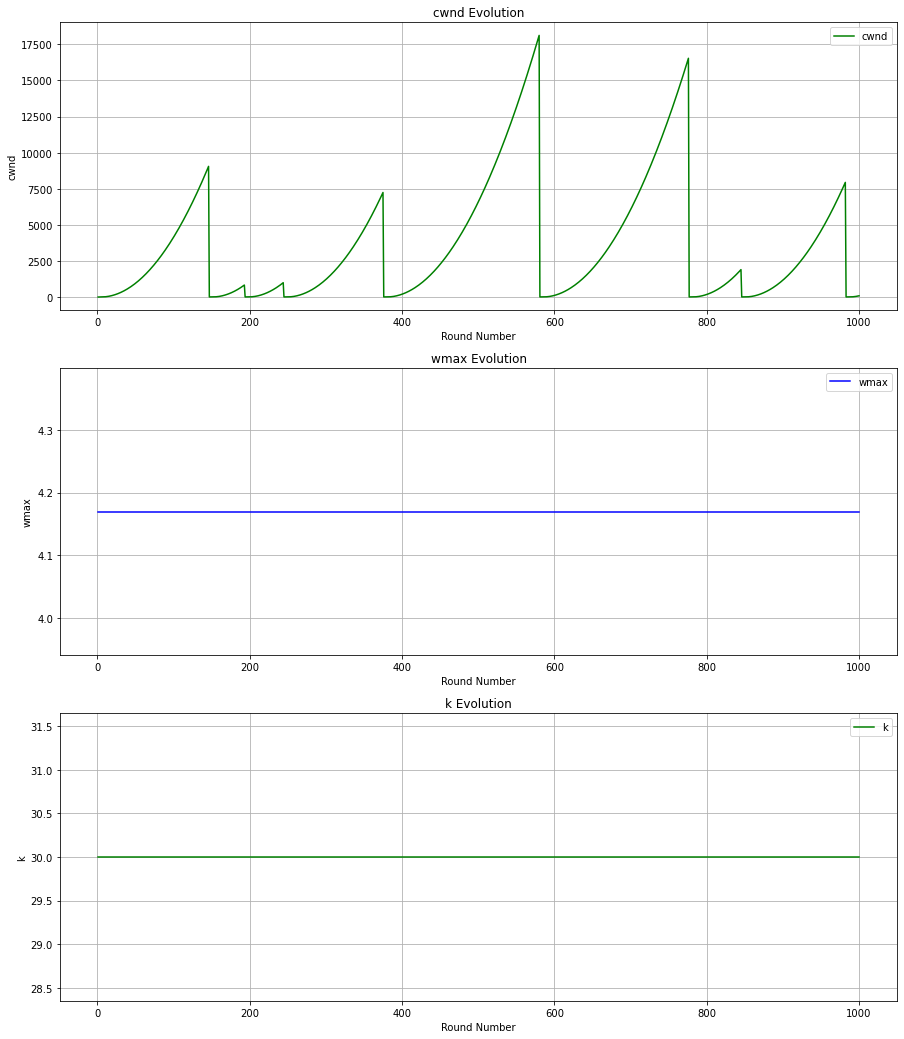

In [23]:
plot_parameters_vs_rounds(df11, parameters)

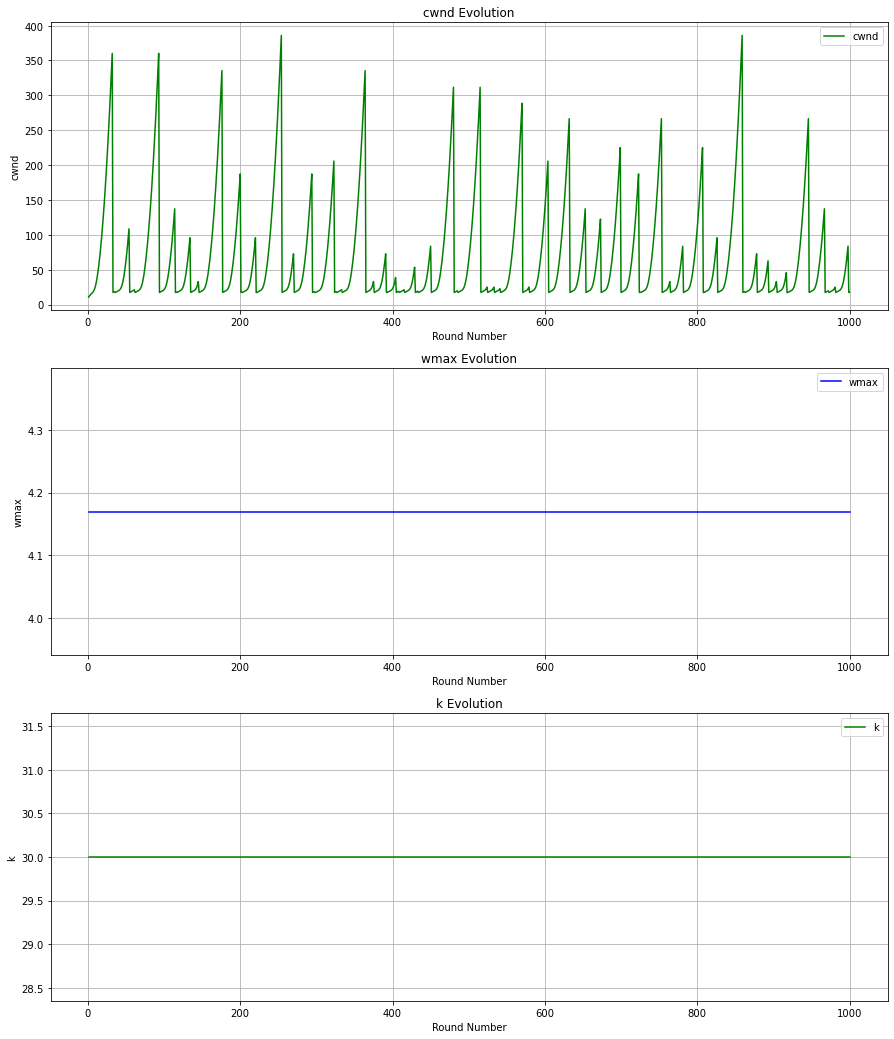

In [24]:
plot_parameters_vs_rounds(df21, parameters)